# Group 4 Data Processing/Modeling

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Loading Dataset

In [3]:
data = pd.read_csv('maint_copy.csv')

In [4]:
df = pd.read_csv('onehot_bool.csv')

#### Understanding dataset

In [5]:
data.shape

(10000, 15)

In [6]:
list(data.columns.values)

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF',
 'diff']

In [7]:
unique_UDI_count = data['UDI'].nunique()
print("Number of unique IDs:", unique_UDI_count)

Number of unique IDs: 10000


Okay as you can see here, it's spelled UDI, and not UID. In the meantime, keep your eye out on this until we can change it. 

In [8]:
unique_ProductID_count = data['Product ID'].nunique()
print("Number of unique Product IDs:", unique_ProductID_count)

Number of unique Product IDs: 10000


Contrary to good practice, someone input ProductID as Product ID, there is a SPACE in the middle, please be mindful until we can change it. 

In [9]:
unique_Type_count = data['Type'].nunique()
print("Number of unique Types:", unique_Type_count)

Number of unique Types: 3


Please look at the code above. There is only three unique values. Just like how on the Titanic Dataset for the embark column, we need to do a one-hot encoding (or whatever it's called) for this column. Split these three values in three columns and add either Boolean values or 0 and 1s (I opt for the latter).

In [10]:
print(data.head())

    UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0  5910     H35323    H                300.7                    310.2   
1    70     L47249    L                298.9                    309.0   
2  1325     M16184    M                298.8                    310.1   
3  1497     L48676    L                298.0                    308.7   
4  3612     L50791    L                301.7                    310.9   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1364         65.3              208                1    1   
1                    1410         65.7              191                1    0   
2                    1243         74.5              194                1    0   
3                    1268         69.4              189                1    0   
4                    1405         46.4              207                1    1   

   HDF  PWF  OSF  RNF  diff  
0    0    1    1    0     2  
1    0    1   

In [11]:
# The count and frequency of values in Type
data['Type'].unique()
frequency_type = data['Type'].value_counts()
print(frequency_type)


percentage_type = data['Type'].value_counts(normalize=True) * 100
type_summary = pd.DataFrame({'Count': frequency_type, 'Percentage': percentage_type})
print(type_summary)

L    6000
M    2997
H    1003
Name: Type, dtype: int64
   Count  Percentage
L   6000       60.00
M   2997       29.97
H   1003       10.03


Okay this is some good variation

In [12]:
# The count and frequency of values in Machine Failure
data['Machine failure'].unique()
frequency_machine_fail = data['Machine failure'].value_counts()
print(frequency_machine_fail)

percentage_machine_fail = data['Machine failure'].value_counts(normalize=True) * 100
machine_fail_summary = pd.DataFrame({'Count': frequency_machine_fail, 'Percentage': percentage_machine_fail})
print(machine_fail_summary)

0    9661
1     339
Name: Machine failure, dtype: int64
   Count  Percentage
0   9661       96.61
1    339        3.39


I don't really like those numbers, remember to discuss

In [13]:
# The count and frequency of values in TWF
data['TWF'].unique()
frequency_TWF = data['TWF'].value_counts()
print(frequency_TWF)

percentage_TWF = data['TWF'].value_counts(normalize=True) * 100
TWF_summary = pd.DataFrame({'Count': frequency_TWF, 'Percentage': percentage_TWF})
print(TWF_summary)

0    9954
1      46
Name: TWF, dtype: int64
   Count  Percentage
0   9954       99.54
1     46        0.46


Again, not good, but I'm not sure if this percentage matters.

In [14]:
# The count and frequency of values in HDF
data['HDF'].unique()
frequency_HDF = data['HDF'].value_counts()
print(frequency_HDF)

percentage_HDF = data['HDF'].value_counts(normalize=True) * 100
HDF_summary = pd.DataFrame({'Count': frequency_HDF, 'Percentage': percentage_HDF})
print(HDF_summary)

0    9885
1     115
Name: HDF, dtype: int64
   Count  Percentage
0   9885       98.85
1    115        1.15


In [15]:
# The count and frequency of values in PWF
data['PWF'].unique()
frequency_PWF = data['PWF'].value_counts()
print(frequency_PWF)

percentage_PWF = data['PWF'].value_counts(normalize=True) * 100
PWF_summary = pd.DataFrame({'Count': frequency_PWF, 'Percentage': percentage_PWF})
print(PWF_summary)

0    9905
1      95
Name: PWF, dtype: int64
   Count  Percentage
0   9905       99.05
1     95        0.95


In [16]:
# The count and frequency of values in OSF
data['OSF'].unique()
frequency_OSF = data['OSF'].value_counts()
print(frequency_OSF)

percentage_OSF = data['OSF'].value_counts(normalize=True) * 100
OSF_summary = pd.DataFrame({'Count': frequency_OSF, 'Percentage': percentage_OSF})
print(OSF_summary)

0    9902
1      98
Name: OSF, dtype: int64
   Count  Percentage
0   9902       99.02
1     98        0.98


In [17]:
# The count and frequency of values in RNF
data['RNF'].unique()
frequency_RNF = data['RNF'].value_counts()
print(frequency_RNF)

percentage_RNF = data['RNF'].value_counts(normalize=True) * 100
RNF_summary = pd.DataFrame({'Count': frequency_RNF, 'Percentage': percentage_RNF})
print(RNF_summary)

0    9981
1      19
Name: RNF, dtype: int64
   Count  Percentage
0   9981       99.81
1     19        0.19


Just double-checking that there is for sure no missing values

In [18]:
missing_values = data.isnull().sum()
print(missing_values)

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
diff                       0
dtype: int64


Upon further investigation, I see there is a diff column but the dictionary doesn't explain what it means TT. Since diff is the last column in the dataset, I think it may be like the number of failures given the machine failure attributes like TWF, HDF, PWF, etc. The code below is me trying to figure if that is true.

In [19]:
data['Calculated_Diff'] = data[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum(axis=1)
print((data['diff'] == data['Calculated_Diff']).all())

False


Okay so that didn't work, let me look at the column some more

In [20]:
data['diff'].unique()
frequency_Diff = data['diff'].value_counts()
print(frequency_Diff)

percentage_Diff = data['diff'].value_counts(normalize=True) * 100
Diff_summary = pd.DataFrame({'Count': frequency_Diff, 'Percentage': percentage_Diff})
print(Diff_summary)

 0    9949
 1      41
-1       9
 2       1
Name: diff, dtype: int64
    Count  Percentage
 0   9949       99.49
 1     41        0.41
-1      9        0.09
 2      1        0.01


In [21]:
print(data.corr()['diff'].sort_values(ascending=False))

diff                       1.000000
RNF                        0.592351
Calculated_Diff            0.461806
OSF                        0.285803
PWF                        0.220162
Machine failure            0.111766
HDF                        0.109998
TWF                        0.097512
Torque [Nm]                0.088439
Tool wear [min]            0.048491
Air temperature [K]        0.023588
Process temperature [K]    0.015711
UDI                       -0.003381
Rotational speed [rpm]    -0.043119
Name: diff, dtype: float64


/var/folders/c7/mwgyyxds33bg8rksxm07_r_00000gn/T/ipykernel_1915/3996135019.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr()['diff'].sort_values(ascending=False))


The diff column correlates with RNF 60% of the time, is this strange or just a coincidence? More investigation is needed. 

I'm going to make sure these aren't any duplicate rows.

In [22]:
data.shape

(10000, 16)

In [23]:
unique_df = data.drop_duplicates()
unique_df.shape

(10000, 16)

Okay no duplicates

/var/folders/c7/mwgyyxds33bg8rksxm07_r_00000gn/T/ipykernel_1915/3915858815.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


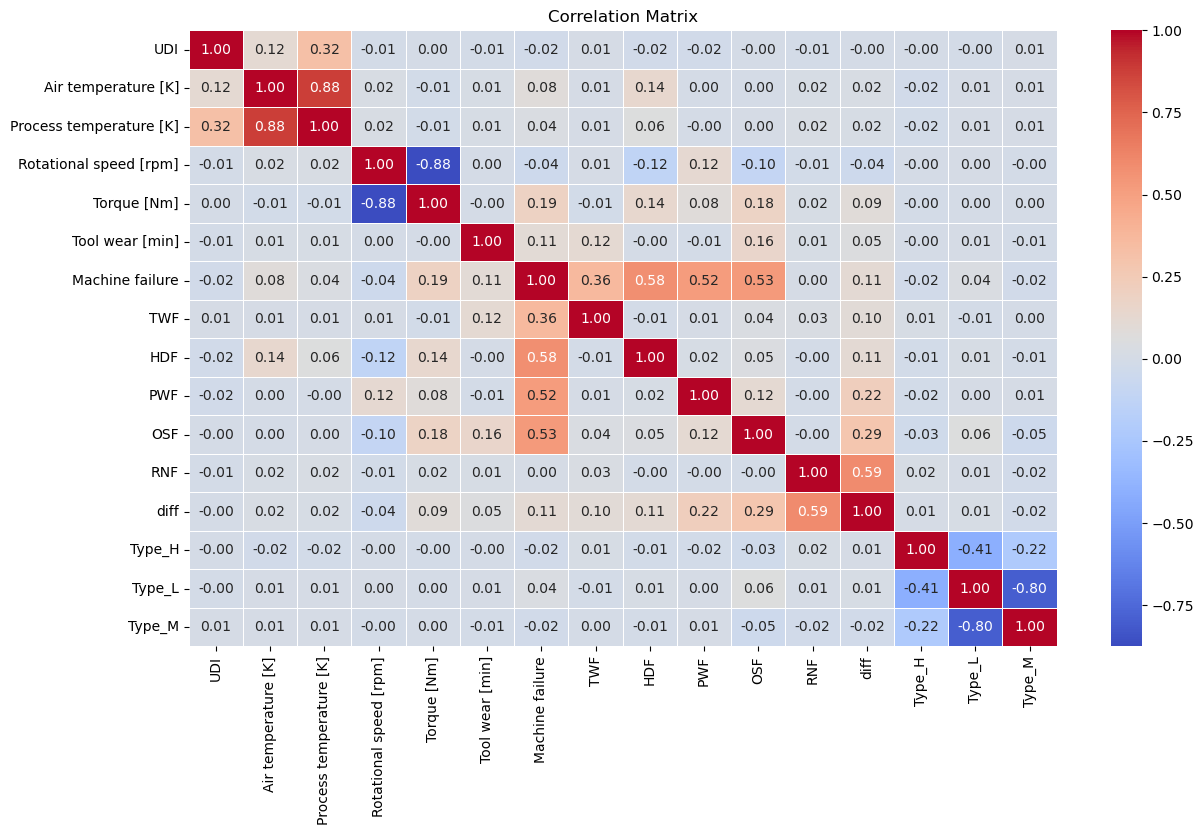

In [24]:
corr = df.corr()
plt.figure(figsize = (14,8))
sns.heatmap(corr, annot=True, cmap = 'coolwarm', fmt = ".2f", linewidths = .5)
plt.title('Correlation Matrix')
plt.show()

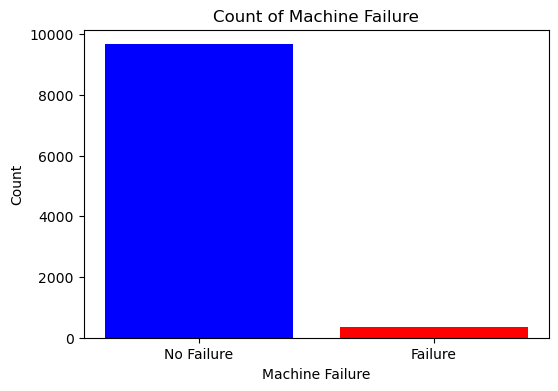

In [25]:
plt.figure(figsize = (6,4))
plt.bar(frequency_machine_fail.index, frequency_machine_fail.values, color = ['blue', 'red'])
plt.xticks([0,1], ['No Failure', 'Failure'])
plt.xlabel('Machine Failure')
plt.ylabel('Count')
plt.title('Count of Machine Failure')
plt.show()

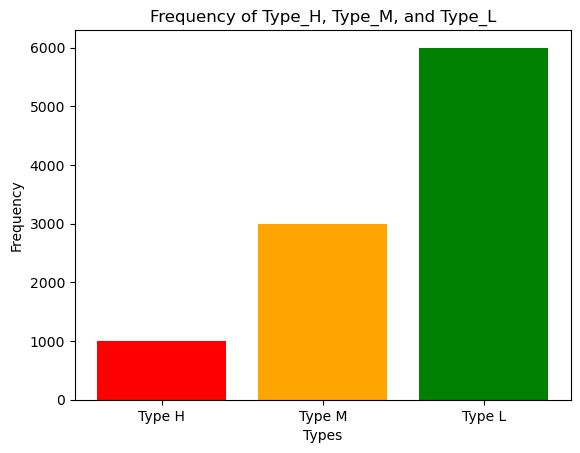

In [31]:
frequency_type_h = df['Type_H'].sum()
frequency_type_m = df['Type_M'].sum()
frequency_type_l = df['Type_L'].sum()
types = ['Type H', 'Type M', 'Type L']
frequencies = [frequency_type_h,frequency_type_m, frequency_type_l]
plt.bar(types, frequencies, color = ['red', 'orange', 'green'])
plt.xlabel('Types')
plt.ylabel('Frequency')
plt.title('Frequency of Type_H, Type_M, and Type_L')
plt.show()

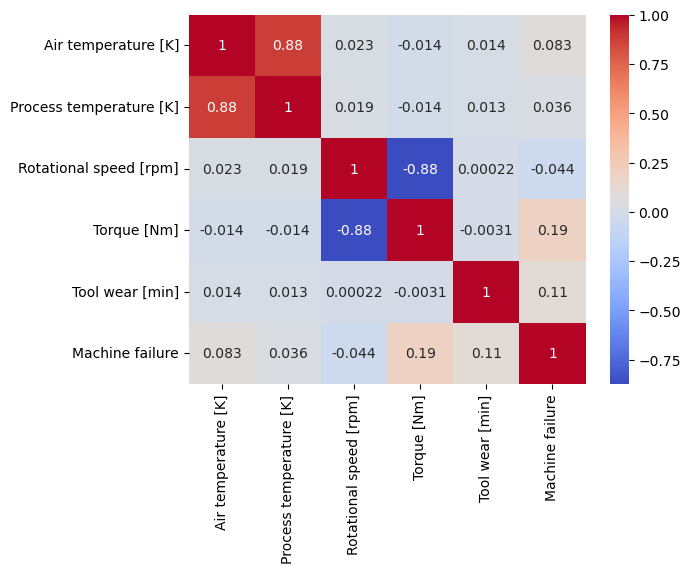

In [32]:
selected_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure']
df_selected = df[selected_columns]
correlation_matrix_1 = df_selected.corr()
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm')
plt.show()

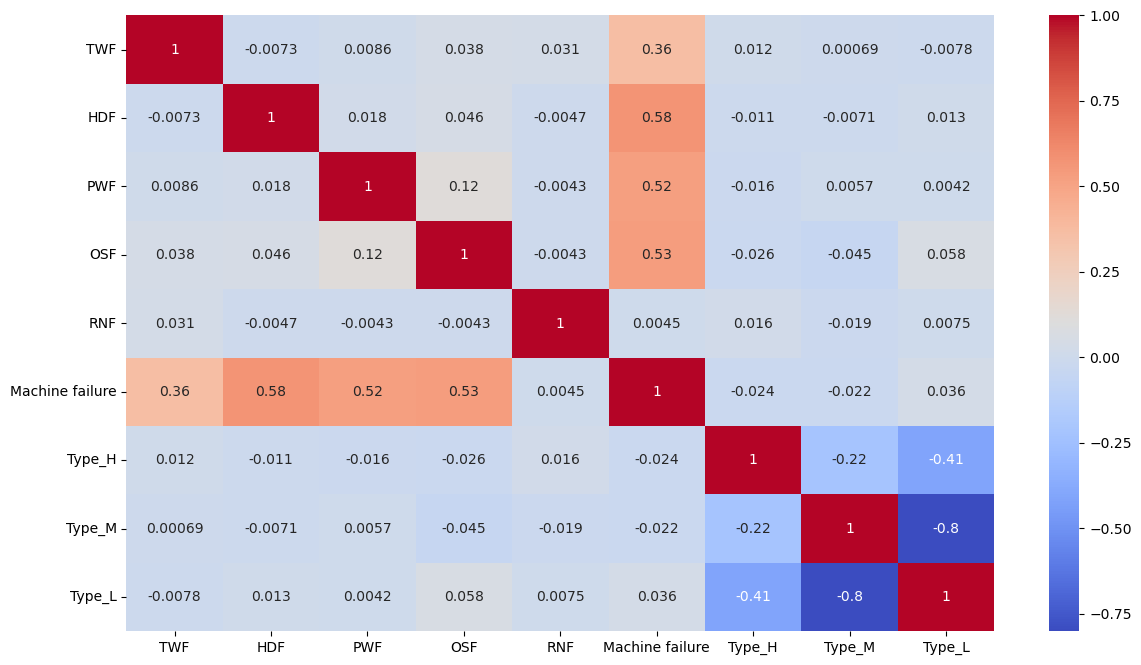

In [36]:
selected_columns_2 = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Machine failure', 'Type_H', 'Type_M', 'Type_L']
df_selected_2 = df[selected_columns_2]
correlation_matrix_2 = df_selected_2.corr()
plt.figure(figsize = (14,8))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm')
plt.show()

In [34]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,diff,Calculated_Diff
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190,0.00340,0.037300
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355,0.07341,0.202763
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-1.00000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2.00000,3.000000


In [40]:
def create_data_dictionary(data):
    data_dict = {
        "Feature Name": [],
        "Data Type": [],
        "Missing Values": [],
        "Sample/Unique Values": []
    }
    
    for column in data.columns:
        data_dict["Feature Name"].append(column)
        data_dict["Data Type"].append(data[column].dtype)
        data_dict["Missing Values"].append(data[column].isnull().sum())
        if pd.api.types.is_numeric_dtype(data[column]):
            # Sample a non_null value
            non_null_sample = data[column].dropna().sample(1).iloc[0] if not data[column].dropna().empty else None
            data_dict["Sample/Unique Values"].append(non_null_sample)
        else:
            data_dict["Sample/Unique Values"].append(data[column].unique())
    return pd.DataFrame(data_dict)

# Example usage
data_dict_df = create_data_dictionary(data)
data_dict_df

,Feature Name,Data Type,Missing Values,Sample/Unique Values
0,UDI,int64,0,5777
1,Product ID,object,0,"[H35323, L47249, M16184, L48676, L50791, L5103..."
2,Type,object,0,"[H, L, M]"
3,Air temperature [K],float64,0,297.4
4,Process temperature [K],float64,0,311.5
5,Rotational speed [rpm],int64,0,1550
6,Torque [Nm],float64,0,33.2
7,Tool wear [min],int64,0,209
8,Machine failure,int64,0,0
9,TWF,int64,0,0


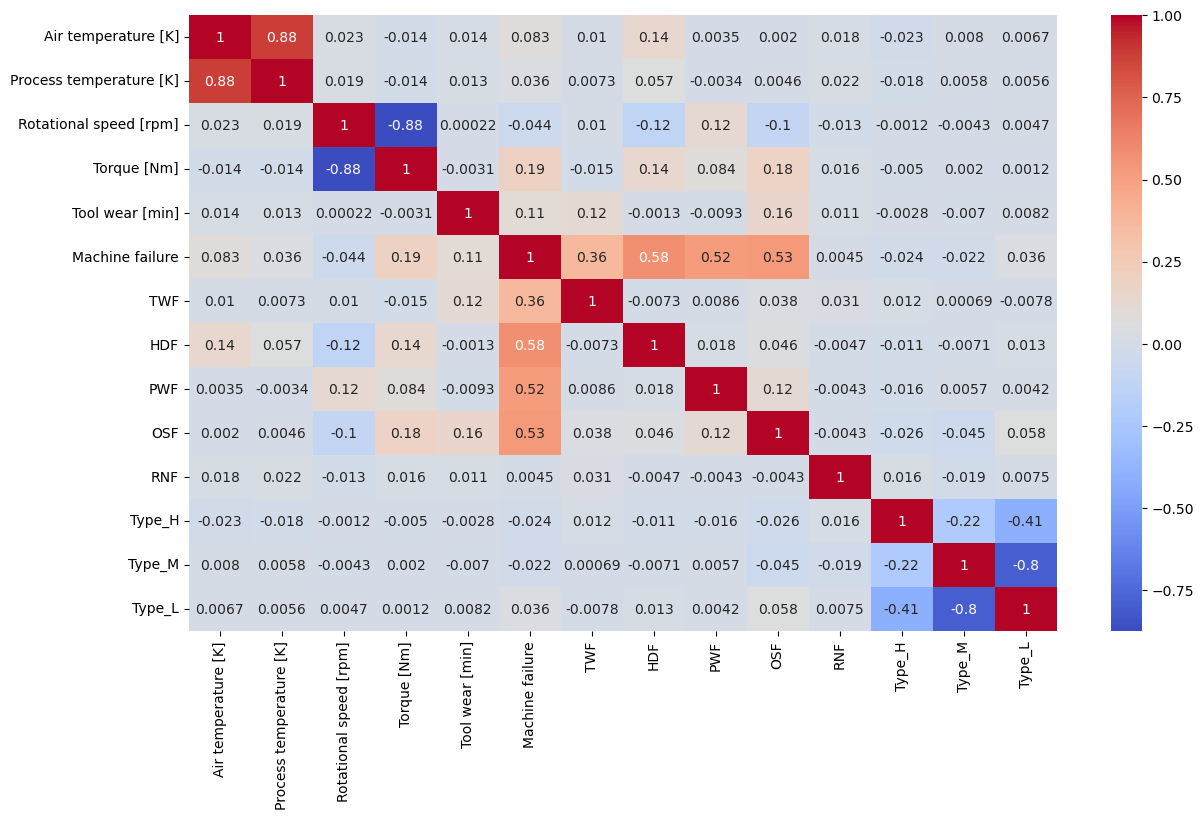

In [45]:
selected_columns_3 = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure','TWF', 'HDF', 'PWF', 'OSF', 'RNF','Type_H', 'Type_M', 'Type_L']
df_selected_3 = df[selected_columns_3]
correlation_matrix_3 = df_selected_3.corr()
plt.figure(figsize = (14,8))
sns.heatmap(correlation_matrix_3, annot=True, cmap='coolwarm')
plt.show()